<a href="https://colab.research.google.com/github/marygizem/-Machine-Learning-and-Predictive-Analytics/blob/main/O_IT134_Week_8_Homework_Initial_Project_Forecasting_Model_BSIT_S3101_Ramos_M_G%2C_Decastillo_P_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup: unzip project + imports

In [ ]:
import zipfile
import os

zip_path = "-Machine-Learning-and-Predictive-Analytics-main.zip"
extract_path = "finmark_project"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted!")

Files extracted!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.style.use("seaborn-v0_8")

 ##Load the preprocessed dataset

Merged dataset to contain:
- Transaction: `Transaction_ID`, `Transaction_Date`, `Quantity`
- Keys: `Company_ID`, `Product_ID`
- Price: `Product_Price_x` (numeric)
- Metadata: company/product fields


In [ ]:
file_path = "finmark_project/-Machine-Learning-and-Predictive-Analytics-main/merged_data.csv"

df = pd.read_csv(file_path)

df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


In [ ]:
file_path = "finmark_project/-Machine-Learning-and-Predictive-Analytics-main/merged_data.csv"

df = pd.read_csv(file_path)

df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,2.0,29.0,19.0,16.0,2021-02-21,97930.993380,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
1,5.0,47.0,3.0,8.0,2021-02-21,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"
2,6.0,80.0,11.0,4.0,2021-07-12,160658.675350,627200.0,Green Partners 80,111227.0,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,"?156,800"
3,8.0,21.0,20.0,7.0,2021-02-21,229217.941468,1792000.0,Dynamic Enterprises 21,NaN,"Ortigas Ave, Barangay 707, Davao City, Philipp...",FinSphere Intelligence Suite,"?224,000"
4,10.0,3.0,20.0,6.0,2021-02-21,238293.851303,1120000.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines",FinSphere Intelligence Suite,"?224,000"


##Cleaning + target variable

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Unit_Price'] = pd.to_numeric(df['Product_Price_x'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df['Revenue'] = df['Unit_Price'] * df['Quantity']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    5329 non-null   float64       
 1   Company_ID        5329 non-null   float64       
 2   Product_ID        5329 non-null   float64       
 3   Quantity          5329 non-null   float64       
 4   Transaction_Date  5329 non-null   datetime64[ns]
 5   Product_Price_x   5329 non-null   float64       
 6   Total_Cost        5329 non-null   float64       
 7   Company_Name      4793 non-null   object        
 8   Company_Profit    4181 non-null   float64       
 9   Address           4793 non-null   object        
 10  Product_Name      4799 non-null   object        
 11  Product_Price_y   4799 non-null   object        
 12  Unit_Price        5329 non-null   float64       
 13  Revenue           5329 non-null   float64       
dtypes: datetime64[ns](1), fl

## Feature engineering

### 3.1 Calendar / seasonality
### 3.2 Recency & momentum
### 3.3 Customer & product value


In [ ]:
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['Quarter'] = df['Transaction_Date'].dt.quarter
df['DayOfWeek'] = df['Transaction_Date'].dt.dayofweek
df['Is_Weekend'] = (df['DayOfWeek'] >= 5).astype(int)

In [ ]:
# Always do this first to avoid duplicate-index alignment issues
df = df.sort_values(['Company_ID', 'Transaction_Date', 'Transaction_ID']).reset_index(drop=True)

company_roll = (
    df.groupby('Company_ID')
      .rolling('30D', on='Transaction_Date')['Revenue']
      .sum()
      .reset_index(level=0, drop=True)
)

# Assign by position (no index alignment)
df['Company_30D_Revenue_Rolling'] = company_roll.to_numpy()

## Monthly aggregation (forecast target)


In [ ]:
df = df.sort_values(['Product_ID', 'Transaction_Date', 'Transaction_ID']).reset_index(drop=True)

product_roll = (
    df.groupby('Product_ID')
      .rolling('30D', on='Transaction_Date')['Quantity']
      .sum()
      .reset_index(level=0, drop=True)
)

df['Product_30D_Quantity_Rolling'] = product_roll.to_numpy()

In [ ]:
df[['Company_ID','Transaction_Date','Revenue','Company_30D_Revenue_Rolling']].head(10)

,Company_ID,Transaction_Date,Revenue,Company_30D_Revenue_Rolling
0,30.0,2020-11-05,1.525989e+06,1.525989e+06
1,64.0,2020-11-12,1.422961e+06,1.422961e+06
2,54.0,2020-11-22,7.823757e+05,7.823757e+05
3,85.0,2020-11-24,1.125430e+06,1.125430e+06
4,26.0,2021-01-04,8.387205e+05,8.387205e+05
5,2.0,2021-01-15,6.761370e+05,6.761370e+05
6,38.0,2021-02-08,3.962073e+05,6.598328e+05
7,36.0,2021-02-21,5.647441e+05,1.381004e+06
8,72.0,2021-02-21,9.150790e+05,9.150790e+05
9,70.0,2021-02-21,1.021440e+06,2.759705e+06


In [ ]:
monthly = (
    df.set_index('Transaction_Date')
      .resample('MS')
      .agg({
          'Revenue': 'sum',
          'Quantity': 'sum',
          'Transaction_ID': 'count'
      })
)

monthly.head()

,Revenue,Quantity,Transaction_ID
Transaction_Date,,,
2020-10-01,4.601156e+06,32.0,3
2020-11-01,4.903053e+07,368.0,33
2020-12-01,2.940578e+07,204.0,21
2021-01-01,4.813537e+07,347.0,35
2021-02-01,5.697238e+09,41954.0,3999


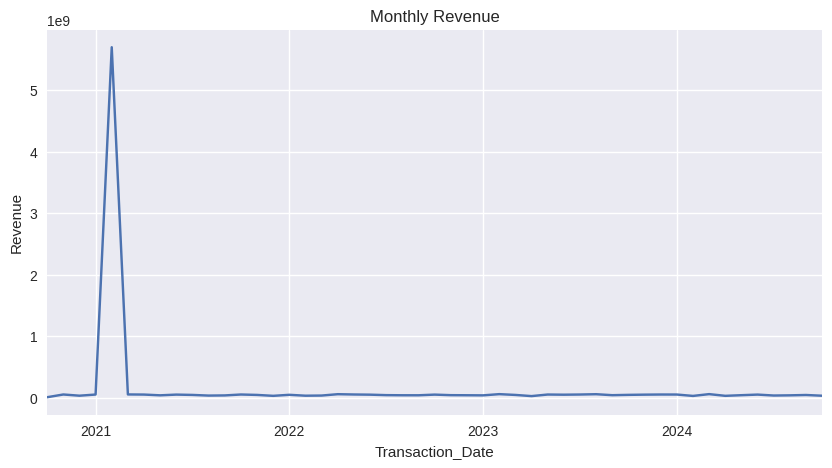

In [ ]:
plt.figure(figsize=(10,5))
monthly['Revenue'].plot()
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.show()

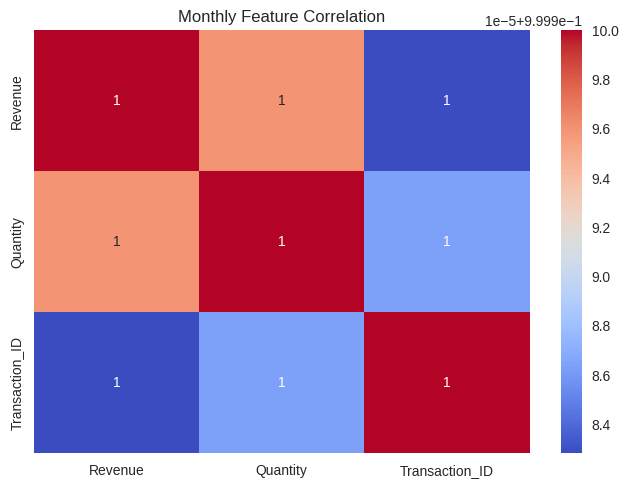

In [ ]:
sns.heatmap(monthly.corr(), annot=True, cmap="coolwarm")
plt.title("Monthly Feature Correlation")
plt.show()

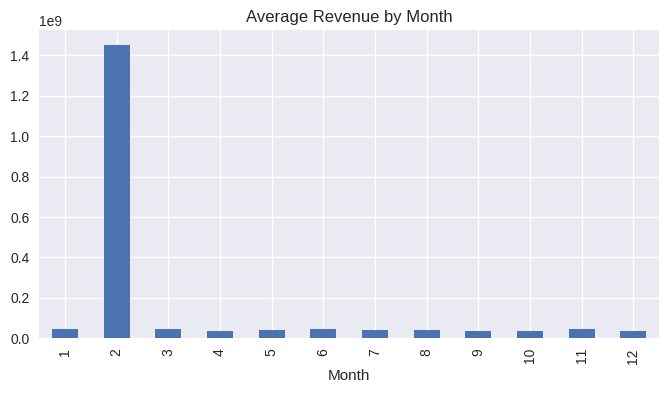

In [ ]:
monthly['Month'] = monthly.index.month

seasonality = monthly.groupby('Month')['Revenue'].mean()

seasonality.plot(kind='bar', figsize=(8,4))
plt.title("Average Revenue by Month")
plt.show()

## Forecasting model (SARIMAX) + quick backtest


In [ ]:
monthly['Log_Revenue'] = np.log1p(monthly['Revenue'])

model = SARIMAX(
    monthly['Log_Revenue'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

forecast = results.get_forecast(steps=3)
pred_log = forecast.predicted_mean
pred = np.expm1(pred_log)

pred

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
2024-11-01,4.276138e+07
2024-12-01,3.698219e+07
2025-01-01,3.972633e+07


##3 months Forecast

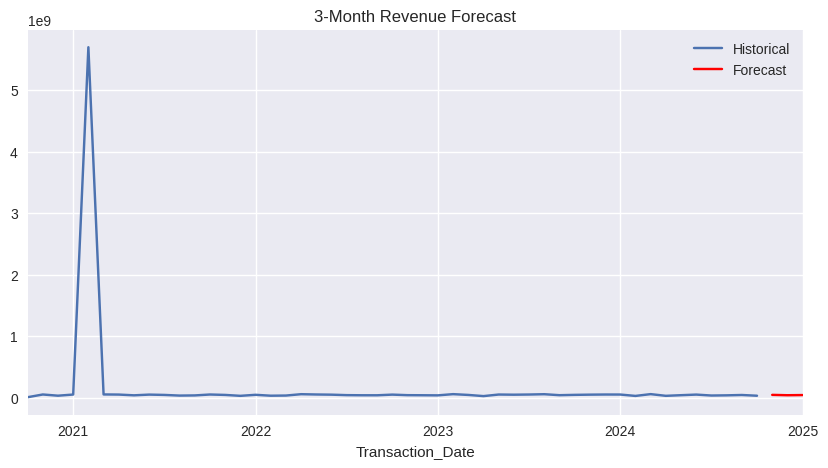

In [ ]:
plt.figure(figsize=(10,5))
monthly['Revenue'].plot(label="Historical")
pred.plot(label="Forecast", color="red")
plt.legend()
plt.title("3-Month Revenue Forecast")
plt.show()

In [ ]:
df.to_csv("finmark_with_features.csv", index=False)

In [ ]:
pred.to_csv("3_month_forecast.csv")